In [29]:
import numpy as np

In [30]:
from matplotlib import pyplot as plt

In [31]:
import pandas as pd

In [32]:
%matplotlib inline

### **1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [33]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [38]:
b = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - (zp.mean() ** 2))
b

2.620538882402765

In [39]:
a = ks.mean() - b * zp.mean()
a

444.1773573243596

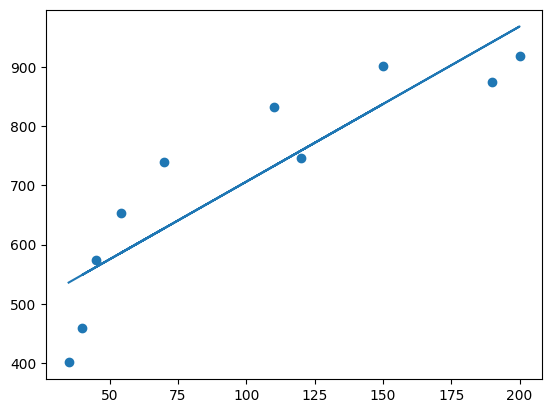

In [40]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp)

In [41]:
mse_ = np.sum(((a + b * zp) - ks) ** 2 / 10)
mse_

6470.414201176659

**без interсept**

In [42]:
zp = zp.reshape(1, len(zp))
ks = ks.reshape(1, len(ks))

In [43]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[5.88982042]])

In [44]:
mse_ = np.sum(((0 + 5.88982042 * zp) - ks) ** 2 / 10)
mse_

56516.85841571942

In [45]:
def mse_(w1, y=ks, X=zp, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [46]:
mse_(5.88982042)

56516.85841571943

**С intercept**

In [47]:
zp = np.vstack([np.ones((1, 10)), zp])

In [48]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[444.17735732],
       [  2.62053888]])

### **2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [49]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [50]:
alpha = 1e-6

In [51]:
w1 = 0.1

In [52]:
def mse_(w1, y=ks, X=zp, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [54]:
for i in range(1000):
    fp = (1 / 10) * np.sum(2 * (w1 * zp - ks) * zp)
    w1 -= alpha * fp
    if i % 100 == 0:
        print(f'Итерация: {i}, w1 : {w1}, mse: {mse_(w1) }')

Итерация: 0, w1 : 5.8898204201285544, mse: 56516.85841571941
Итерация: 100, w1 : 5.889820420132437, mse: 56516.85841571943
Итерация: 200, w1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 300, w1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 400, w1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 500, w1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 600, w1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 700, w1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 800, w1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 900, w1 : 5.889820420132673, mse: 56516.85841571943


### **3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [55]:
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

In [56]:
def _mse_pa(a,b,x,y):
    return 2*np.sum((a+b*x)-y)/len(x)

In [57]:
def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

In [58]:
alpha=5e-05

In [59]:
b=0.1
a=0.1
mseab_min=_mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a

for i in range(1000000):
    a-=alpha*_mse_pa(a,b,zp,ks)
    b-=alpha*_mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={_mse_ab(a, b, zp,ks)}')
    if _mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=_mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444

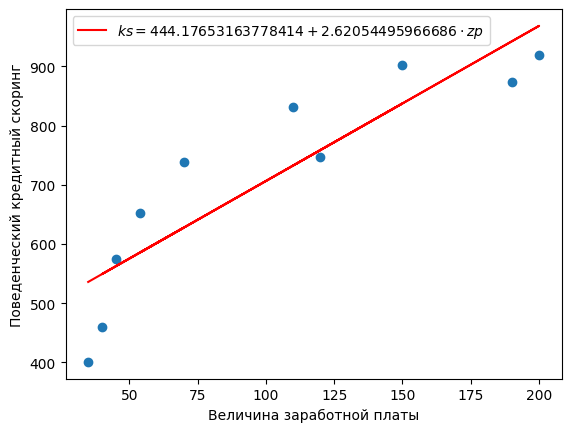

In [60]:
plt.scatter(zp,ks)
plt.plot(zp,a_min+b_min*zp, c='r', label=r'$ks=444.17653163778414+2.62054495966686\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()